# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# You have to include the full link to the csv file containing your dataset
df = pd.read_csv('../data/Marketing_data.csv')
df.head()
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()
# 18 features with 8950 points  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


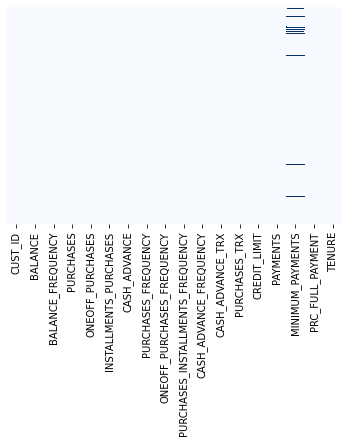

In [5]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()


In [8]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

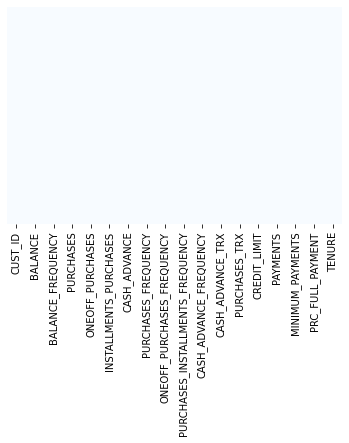

In [9]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [10]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

In [11]:
# Let's drop Customer ID since it has no meaning here 
df.drop("CUST_ID", axis = 1, inplace= True)

In [12]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
n = len(df.columns)
n

17

In [14]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

c:\Users\Sebas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Sebas\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\Users\Sebas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarnin

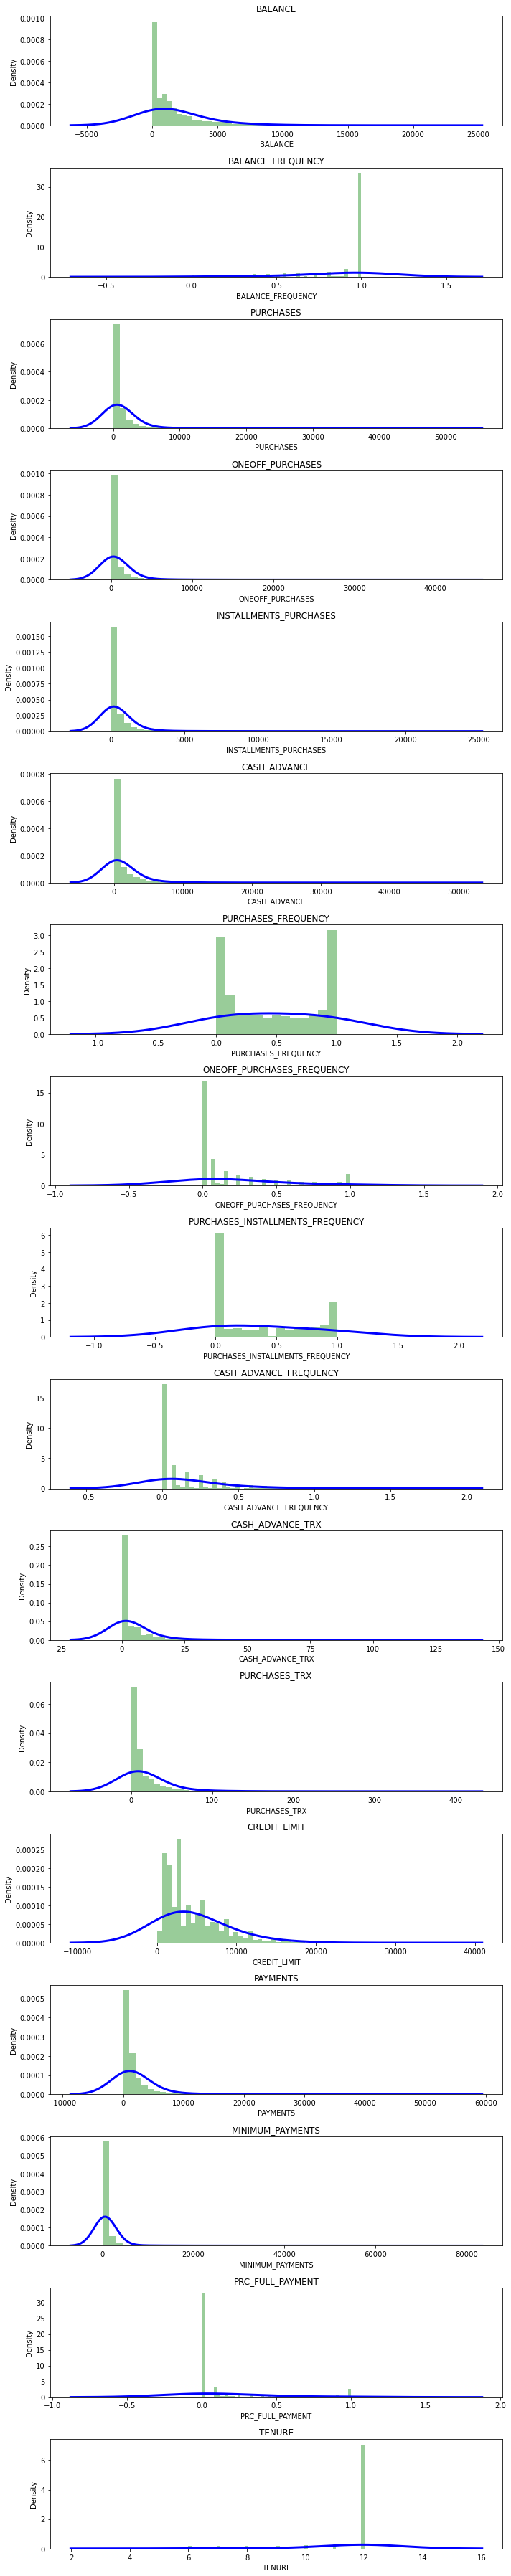

In [15]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], 
               kde_kws={"color": "b", "lw": 3, "label": "KDE", 'bw': 1},
               hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()
plt.show()

In [16]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


In [17]:
correlations = df.corr()


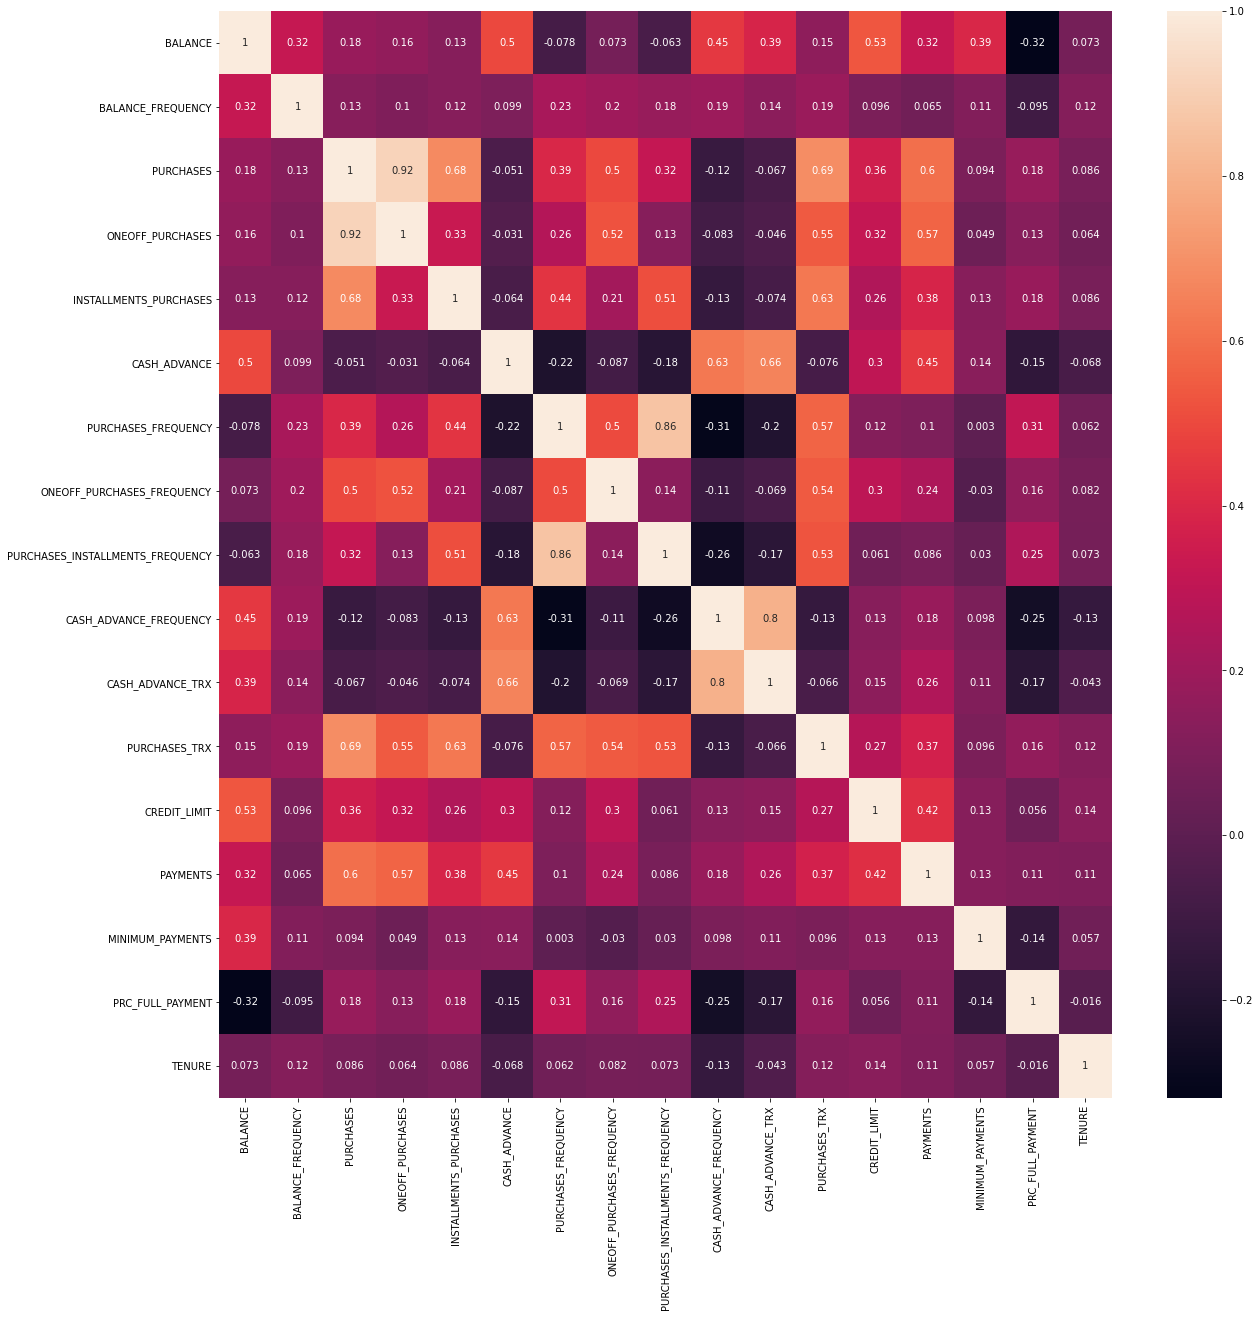

In [18]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
plt.show()
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


## Feature Compression using PCA
We got many features whcih are correlated! In order to come up with a meaningfull segmentation with interpretable results, we need to compress the feature space; the best and by far most interpretable way is to use a principal component analysis!

### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [21]:
X_train, X_test = train_test_split(
    df, 
    test_size=0.33, 
    random_state=123
)

In [22]:
X_test.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8884,5.911397,0.500000,0.00,0.00,0.0,19.712686,0.00,0.00,0.0,0.166667,1,0,500.0,32.355459,32.958244,0.500000,6
2771,2632.469367,1.000000,0.00,0.00,0.0,535.955512,0.00,0.00,0.0,0.250000,4,0,3000.0,737.932369,736.750992,0.000000,12
4345,4.054657,0.727273,264.02,264.02,0.0,0.000000,0.25,0.25,0.0,0.000000,0,4,7000.0,274.692435,55.272081,0.111111,12


### Scale Data

In [23]:
# in the first step we need to scale the data to
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.74530512, -0.63358206, -0.40720687, ..., -0.31381157,
        -0.5217652 ,  0.36016455],
       [-0.49717266,  0.51712378, -0.15594327, ..., -0.23920979,
        -0.5217652 ,  0.36016455],
       [ 1.11381206,  0.51712378, -0.47579366, ..., -0.089764  ,
        -0.5217652 , -1.90667937],
       ...,
       [-0.49690947,  0.51712378,  1.88483137, ..., -0.28502659,
         2.629909  ,  0.36016455],
       [-0.43280043,  0.51712378, -0.20606986, ..., -0.26720225,
        -0.5217652 ,  0.36016455],
       [-0.68351358,  0.51712378,  0.1465091 , ..., -0.27958693,
         1.19732919,  0.36016455]])

In [24]:
X_train.shape

(5996, 17)

In [25]:
# Obtain the optimal number of components

var_list = []
num_features = X_train.shape[1]
for n in range(1,num_features+1):
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled)
    var_explained = pca.explained_variance_ratio_.cumsum()[-1]
    var_list.append(var_explained)

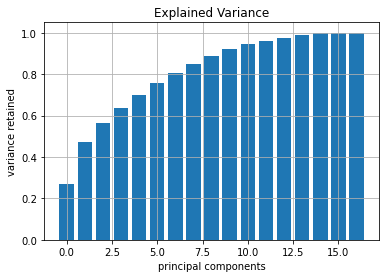

In [26]:
plt.bar(height=var_list, x=range(len(var_list)))
plt.grid()
plt.title('Explained Variance')
plt.xlabel('principal components')
plt.ylabel('variance retained')
plt.show()

In [27]:
# let´s choose 6 components in order to retain 80% of the variances
pca = PCA(n_components=5)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_train_scaled_pca


array([[-0.82238987, -1.63824907, -0.4957836 ,  0.07281334,  0.31880466],
       [ 0.30229173, -1.61267957, -1.72586493,  0.13310526,  0.1187267 ],
       [-1.87551016,  1.76885867, -0.03330789, -0.36728607, -0.39883998],
       ...,
       [ 4.47092687, -1.2783799 ,  0.93662528, -0.98573208, -0.37087026],
       [-0.28577582, -0.74153882, -1.16342139,  0.02089448, -0.36432594],
       [ 0.767192  , -1.53216118,  0.64721501, -0.17350633, -1.99017464]])

In [36]:
# show me the eigenvector as dataframe
pd.DataFrame(pca.components_, columns=list(X_train.columns))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.107550,0.122480,0.411331,0.346153,0.328909,-0.019808,0.325278,0.298460,0.277582,-0.083222,-0.043418,0.392779,0.213248,0.259688,0.064415,0.132931,0.078037
1,0.403439,0.126238,0.038084,0.062091,-0.027220,0.440024,-0.190735,-0.014592,-0.181124,0.434320,0.423075,-0.020580,0.231619,0.259513,0.162752,-0.191215,-0.011792
2,-0.138184,-0.407140,0.268533,0.408328,-0.134939,-0.044635,-0.377322,0.121122,-0.479537,-0.132000,-0.139289,-0.060320,0.085966,0.273722,-0.198462,0.071422,-0.042841
3,0.292588,0.190090,0.026983,0.058522,-0.047160,-0.251149,-0.164509,0.020155,-0.184959,-0.247735,-0.309419,-0.002214,0.119904,-0.142945,0.406773,-0.443013,0.439856
4,0.055249,-0.491372,0.022921,-0.154471,0.351710,0.106637,-0.090837,-0.505035,0.169357,-0.152646,-0.092934,-0.053796,0.113087,0.199697,0.440522,0.148379,-0.021765


5

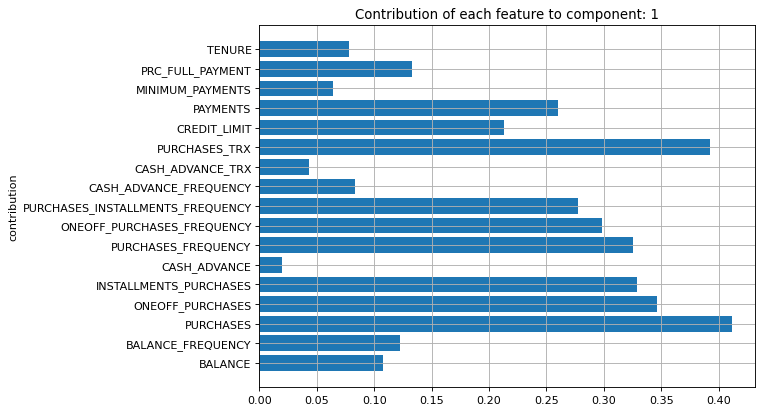

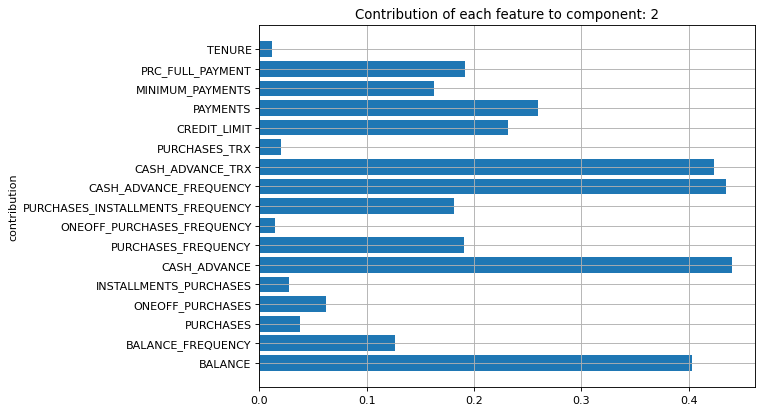

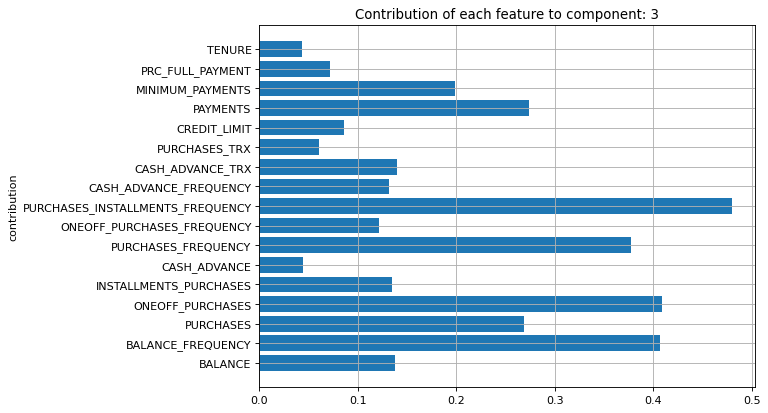

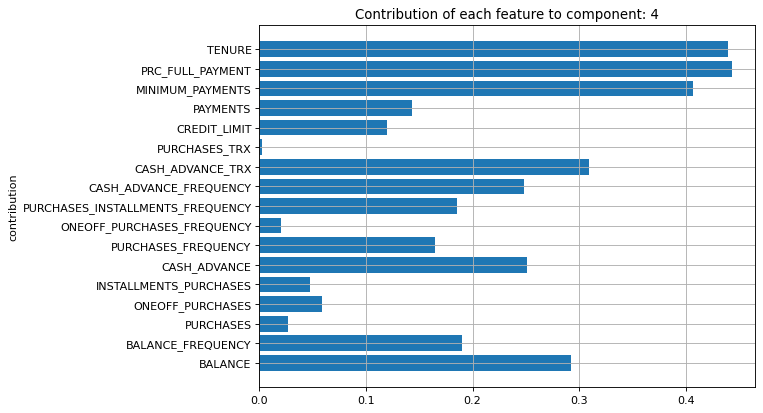

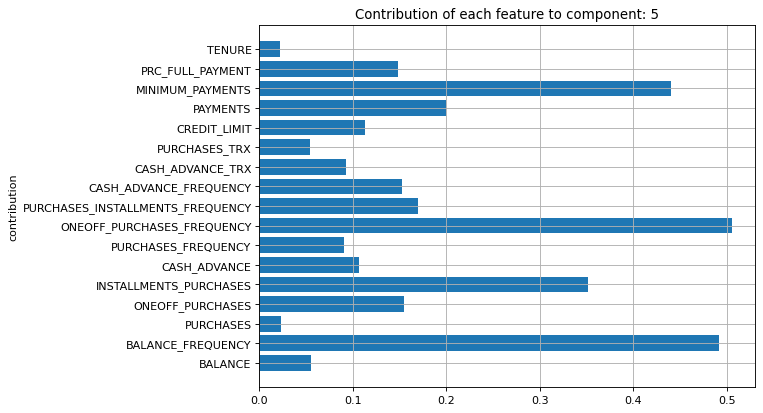

In [74]:
# get the eigenvectors in order to interpret the components

number_components = pca.components_.shape[0]
for component in range(0,number_components):

    #component = 4 # interprete component

    feature_contribution_df = pd.DataFrame(
        data=abs(pca.components_[component]), 
        index=X_train.columns, 
        columns=['feature contribution'])#.sort_values(by='feature contribution')

    plt.figure(figsize=(8, 6), dpi=80)
    plt.barh(width=feature_contribution_df.values.reshape(-1), y=feature_contribution_df.index)
    plt.title('Contribution of each feature to component: {}'.format(component+1))
    plt.ylabel('contribution')
    #plt.xlim(.4,.5)
    #plt.xticks(rotation = 90)
    plt.grid()
    plt.show()

# Kmeans

In [24]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
creditcard_df_scaled.shape

(8950, 17)

In [26]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

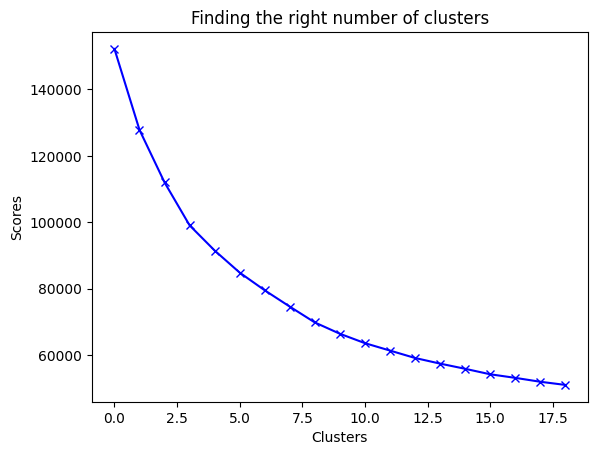

In [27]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

# TASK #6: APPLY K-MEANS METHOD

In [28]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [29]:
kmeans.cluster_centers_.shape

(8, 17)

In [30]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.378372,0.331202,-0.043194,-0.231929,0.323795,-0.368857,0.972029,-0.348848,1.160672,-0.477697,-0.363169,0.164031,-0.276257,-0.225917,-0.097488,0.306631,0.252162
1,-0.701918,-2.131800,-0.307014,-0.230340,-0.302640,-0.323320,-0.547051,-0.427433,-0.441723,-0.522507,-0.376982,-0.416592,-0.172180,-0.202233,-0.257678,0.293891,0.201050
2,1.669661,0.394220,-0.199456,-0.146069,-0.203342,2.032318,-0.447727,-0.182732,-0.396984,1.946962,1.963880,-0.232551,1.023173,0.857306,0.395015,-0.387940,0.063511
3,0.141901,0.430008,0.950471,0.901022,0.592018,-0.304923,1.093327,1.867565,0.538153,-0.405662,-0.315825,1.204855,0.708653,0.399187,-0.047214,0.454814,0.307809
4,-0.337794,-0.349455,-0.284231,-0.208737,-0.288211,0.065446,-0.197106,-0.271926,-0.229662,0.302135,-0.002861,-0.385258,-0.557568,-0.390736,-0.209560,0.013756,-3.195855
5,0.014841,0.402142,-0.345497,-0.226283,-0.401090,-0.095870,-0.817260,-0.338414,-0.758622,0.097574,-0.032161,-0.467318,-0.296677,-0.244776,-0.042233,-0.452790,0.271106
6,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658
7,1.290312,0.454124,-0.039755,-0.268864,0.399233,-0.000938,0.022469,-0.528409,0.262206,-0.252602,-0.060885,0.219536,-0.004964,-0.129901,11.641856,-0.525551,0.298409


In [31]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,776.924412,0.955729,910.919142,207.483460,703.871004,205.360364,0.880473,0.098390,0.825718,0.039552,0.770468,18.787037,3489.312964,1079.135079,637.014863,2.433989e-01,11.854776
1,103.490974,0.372267,347.264163,210.119722,137.394062,300.854201,0.270793,0.074946,0.188885,0.030585,0.676198,4.354920,3867.989440,1147.698560,263.699513,2.396728e-01,11.786375
2,5039.732557,0.970658,577.063595,349.992890,227.188243,5240.736449,0.310656,0.147945,0.206666,0.524751,16.650867,8.929480,8217.172885,4214.960237,1784.772963,4.024879e-02,11.602312
3,1859.830315,0.979136,3033.900653,2087.949772,946.422579,339.432336,0.929155,0.759589,0.578313,0.053967,1.093553,44.658019,7072.820183,2888.750005,754.176464,2.867398e-01,11.929245
4,861.385360,0.794488,395.941226,245.976624,150.442309,1116.114939,0.411243,0.121337,0.273164,0.195605,3.229299,5.133758,2465.787340,602.000784,375.834865,1.577381e-01,7.240446
5,1595.365208,0.972534,265.045078,216.853586,48.366485,777.827201,0.162345,0.101502,0.062941,0.154670,3.029349,3.094059,3415.016502,1024.540386,765.785049,2.128130e-02,11.880127
6,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,4.066166e-01,11.962500
7,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,2.833333,20.166667,4476.388889,1357.092339,27995.061876,5.551115e-17,11.916667


In [32]:
labels.shape # Labels associated to each data point

(8950,)

In [33]:
labels.max()

7

In [34]:
labels.min()

0

In [35]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([0, 3, 5, ..., 6, 6, 6])

In [36]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


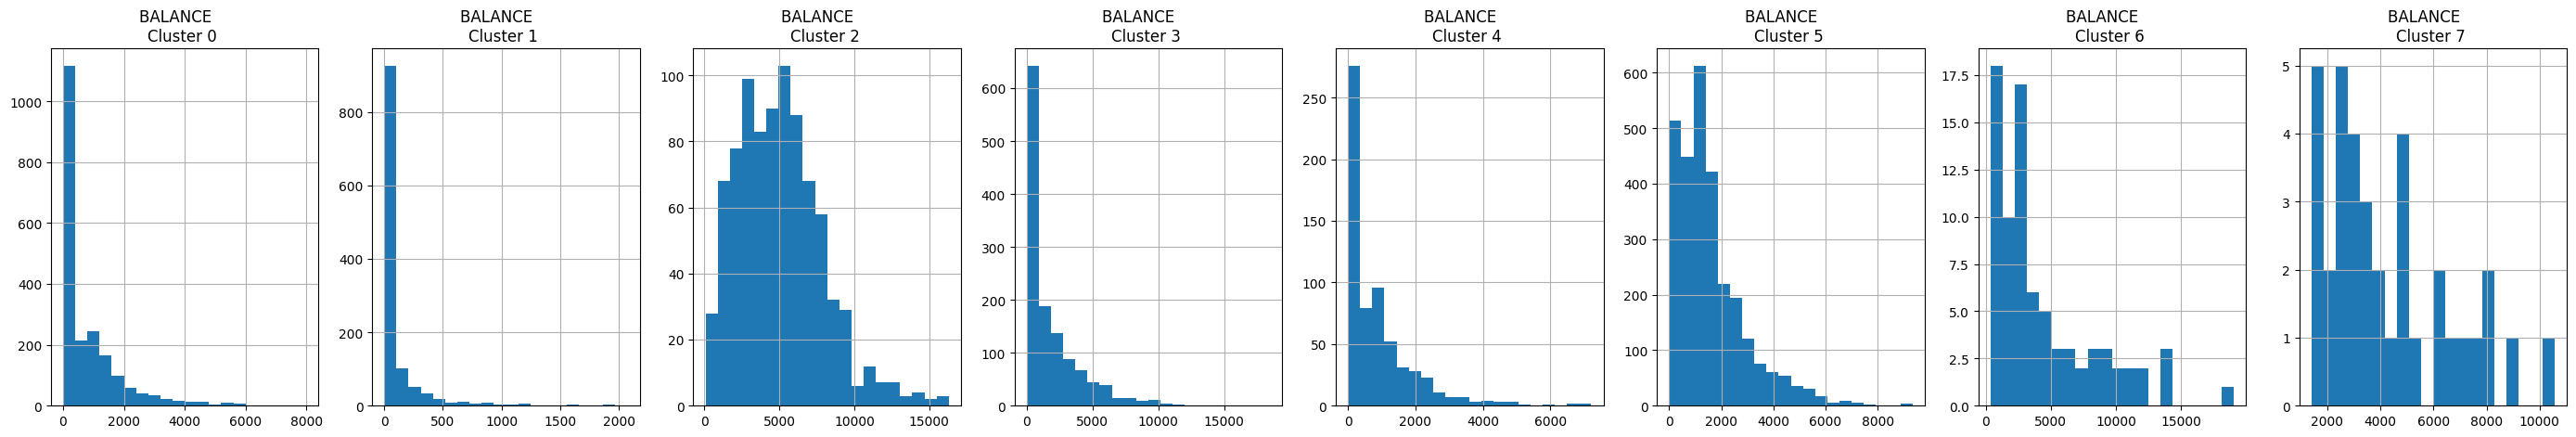

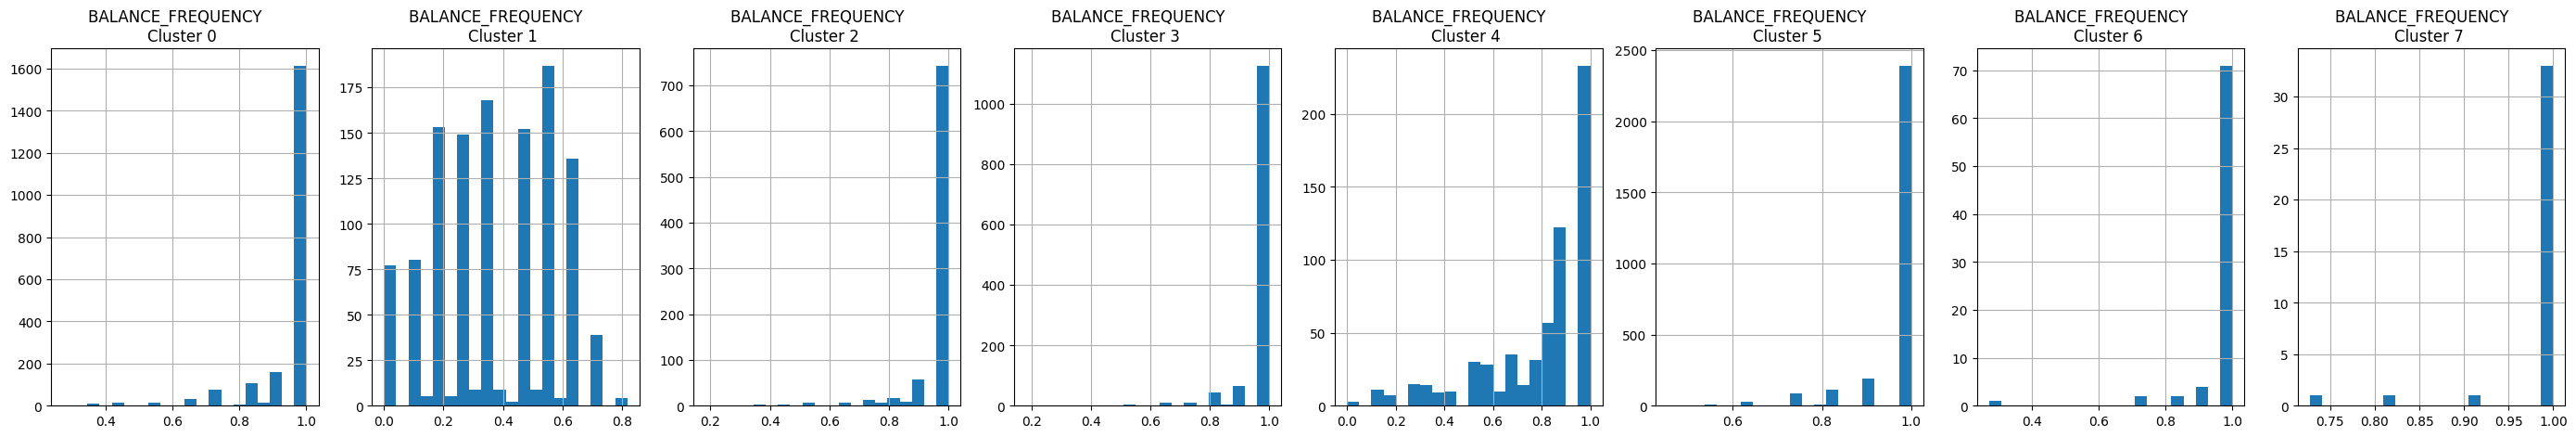

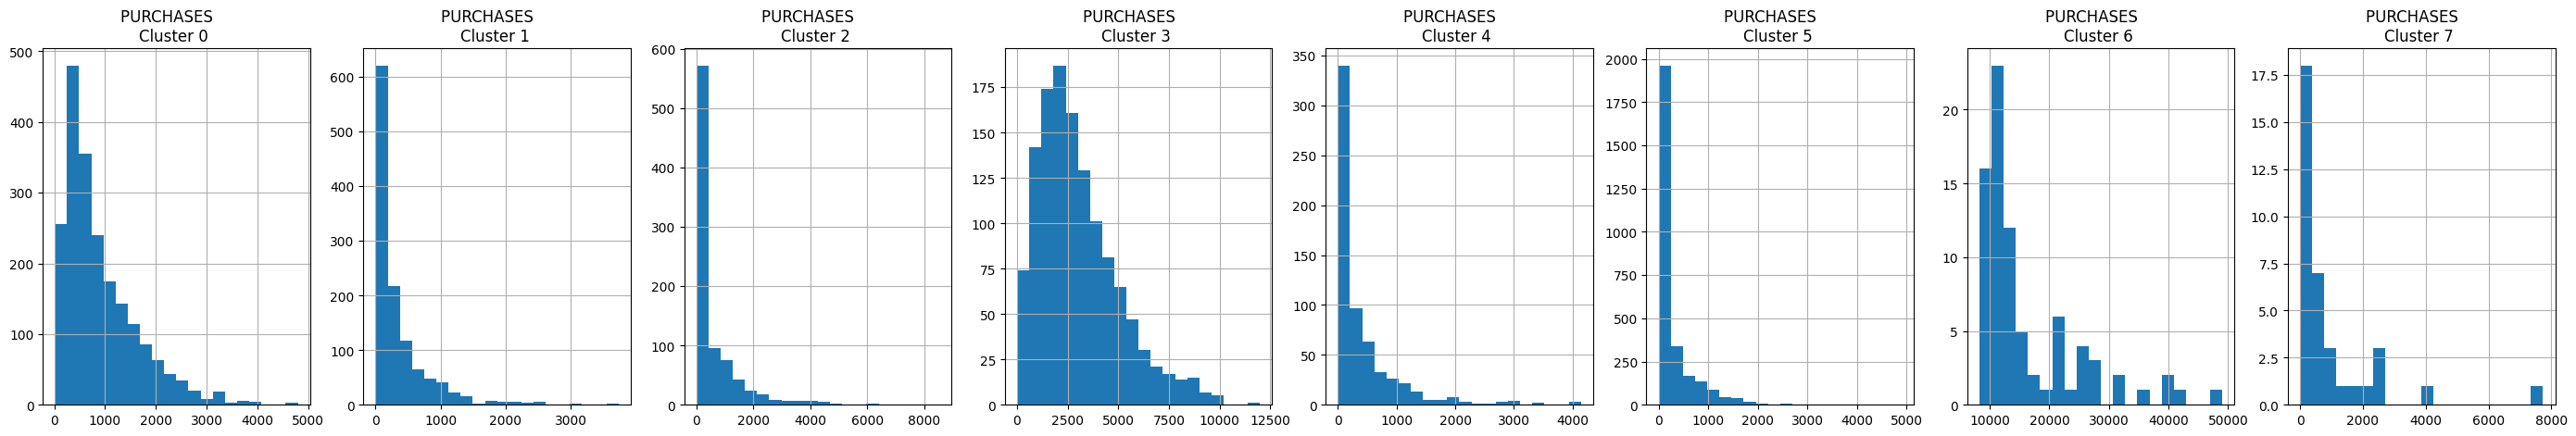

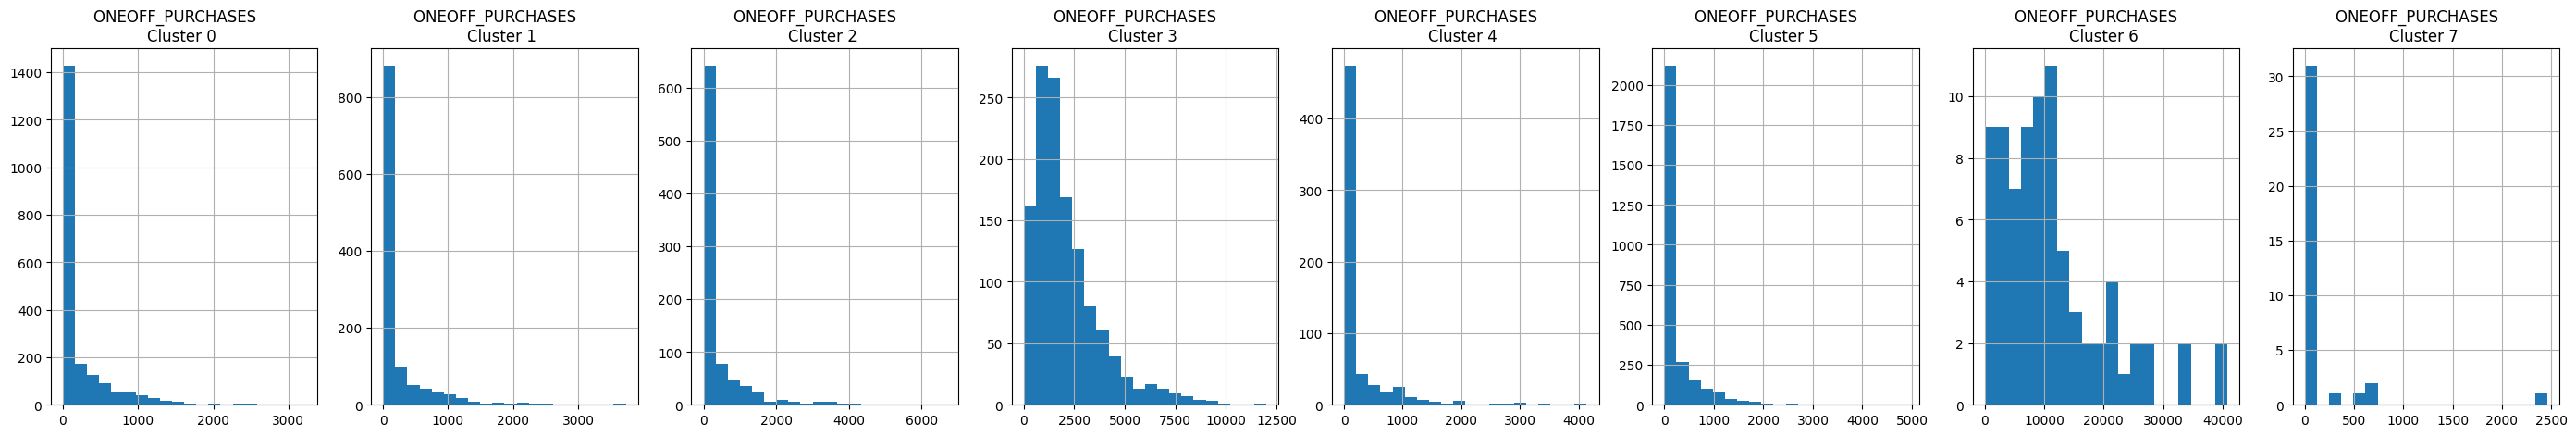

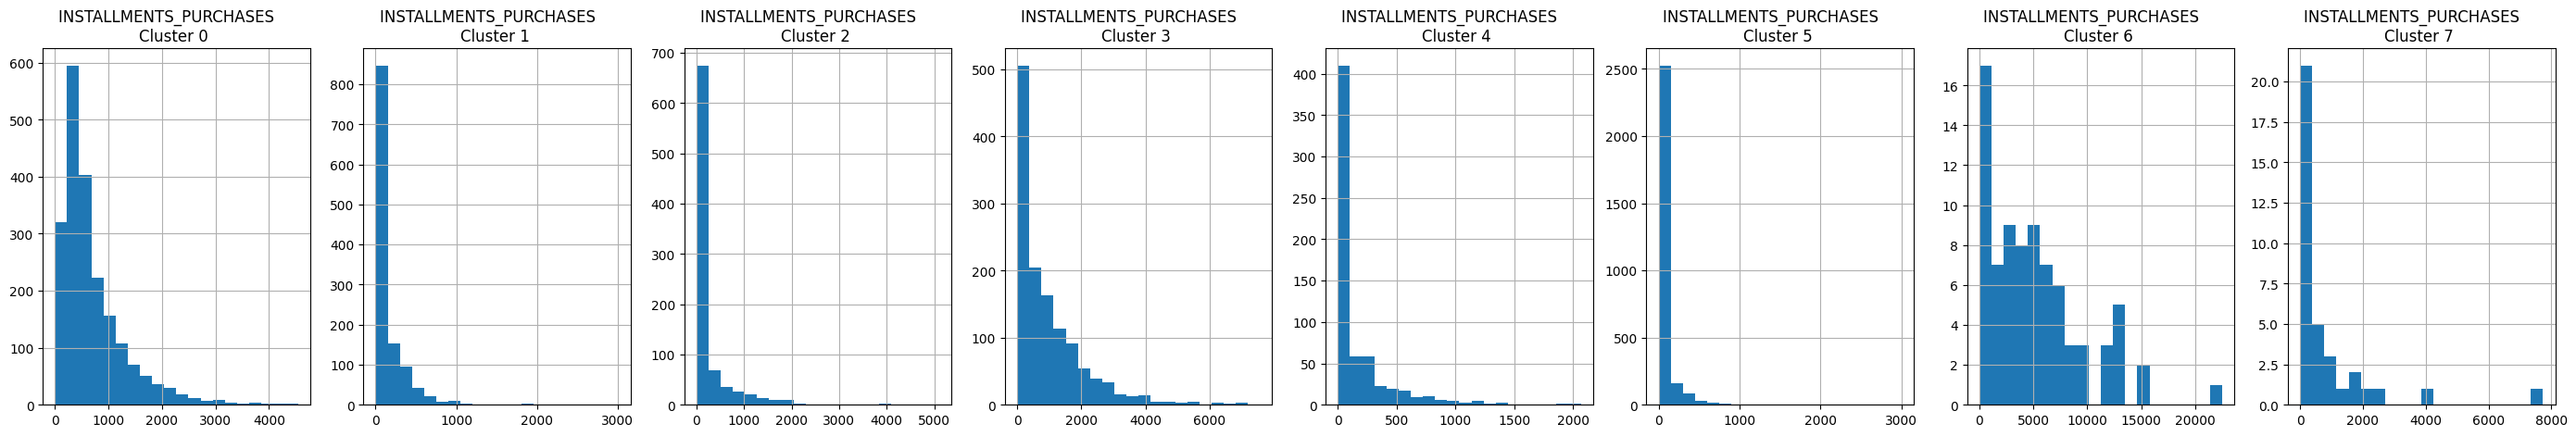

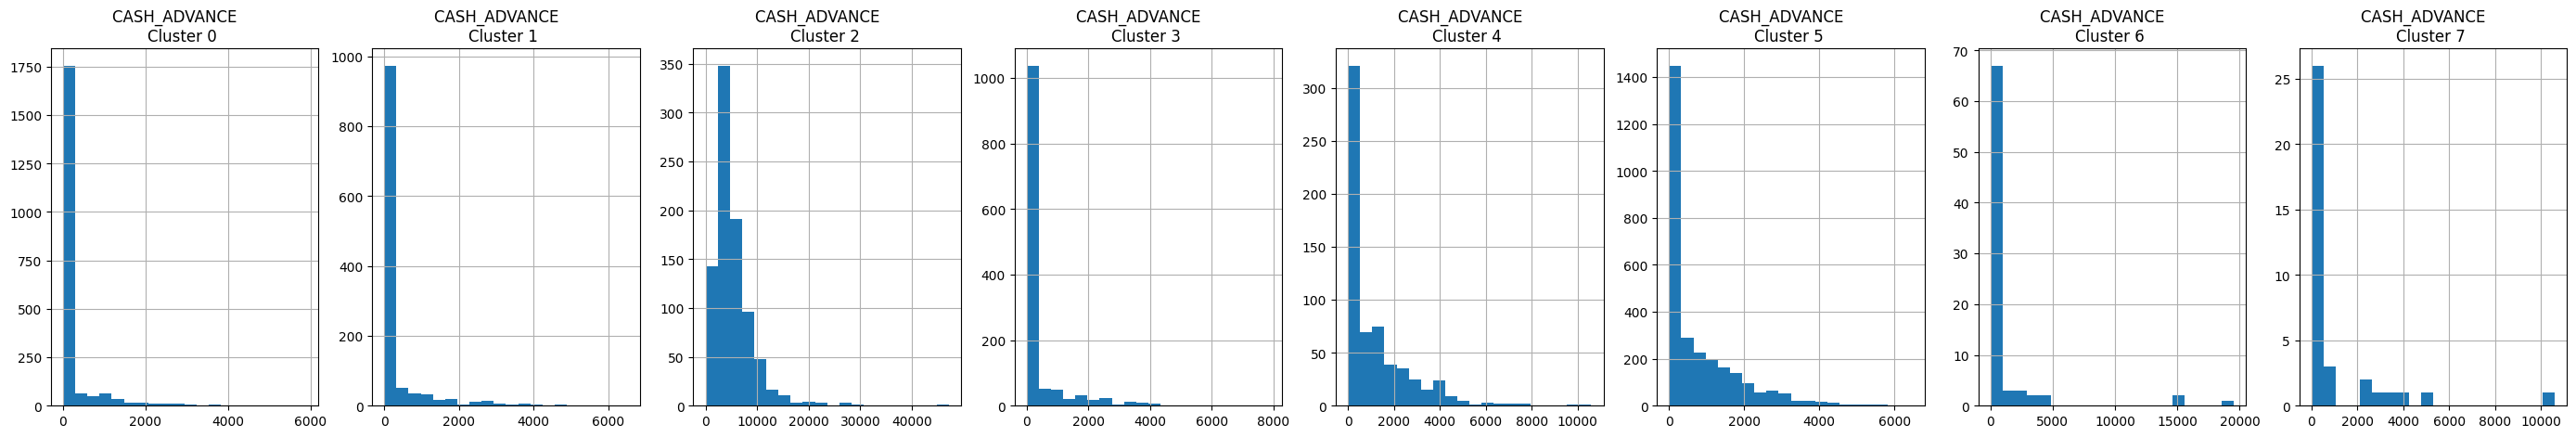

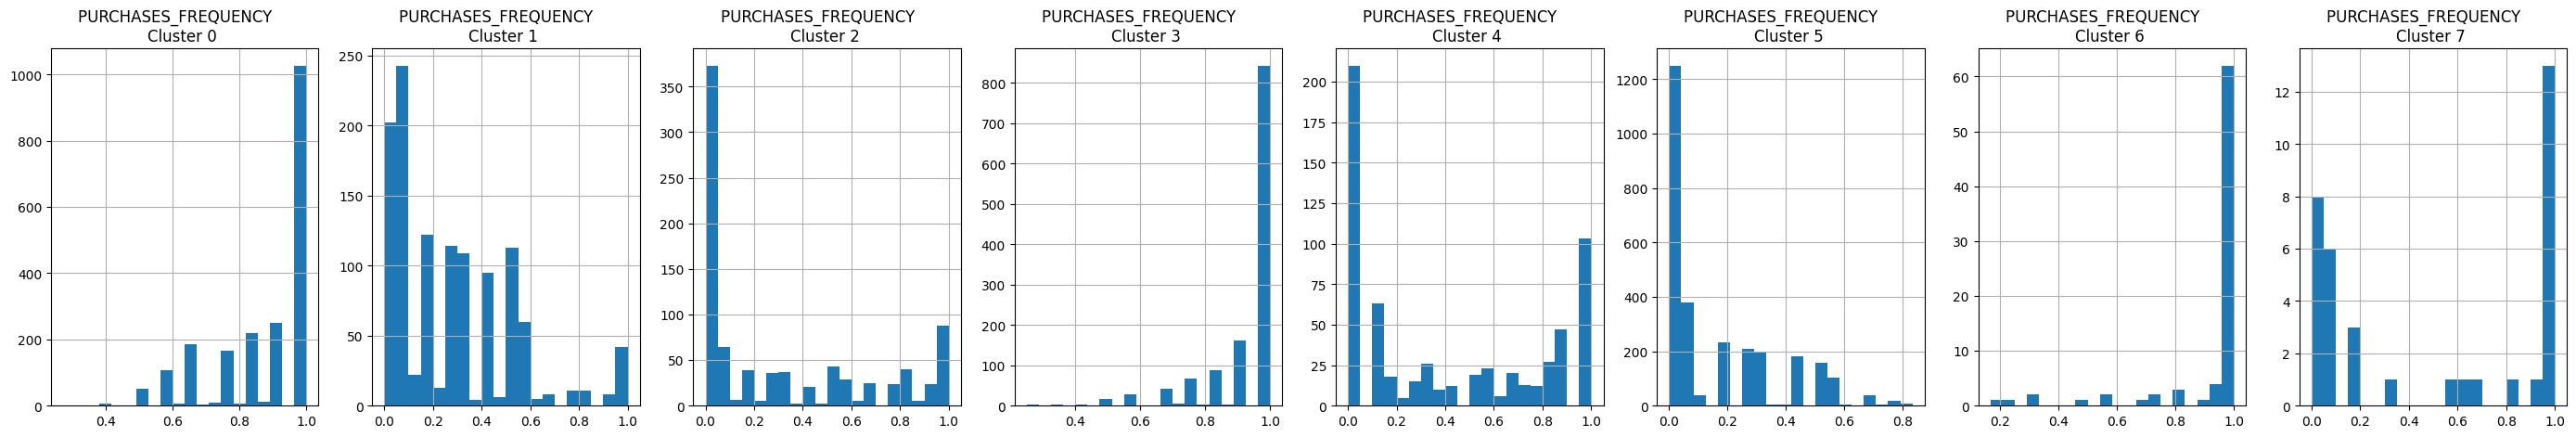

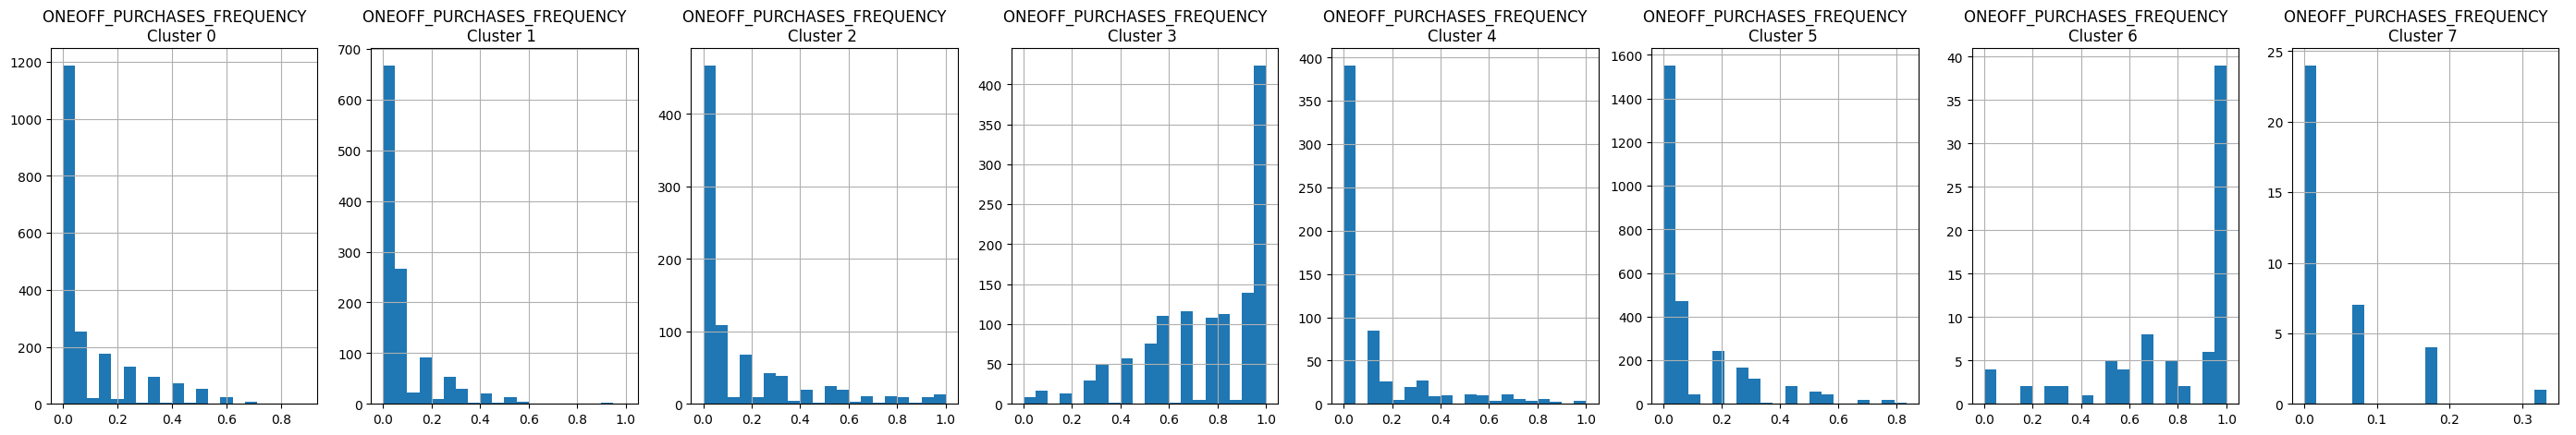

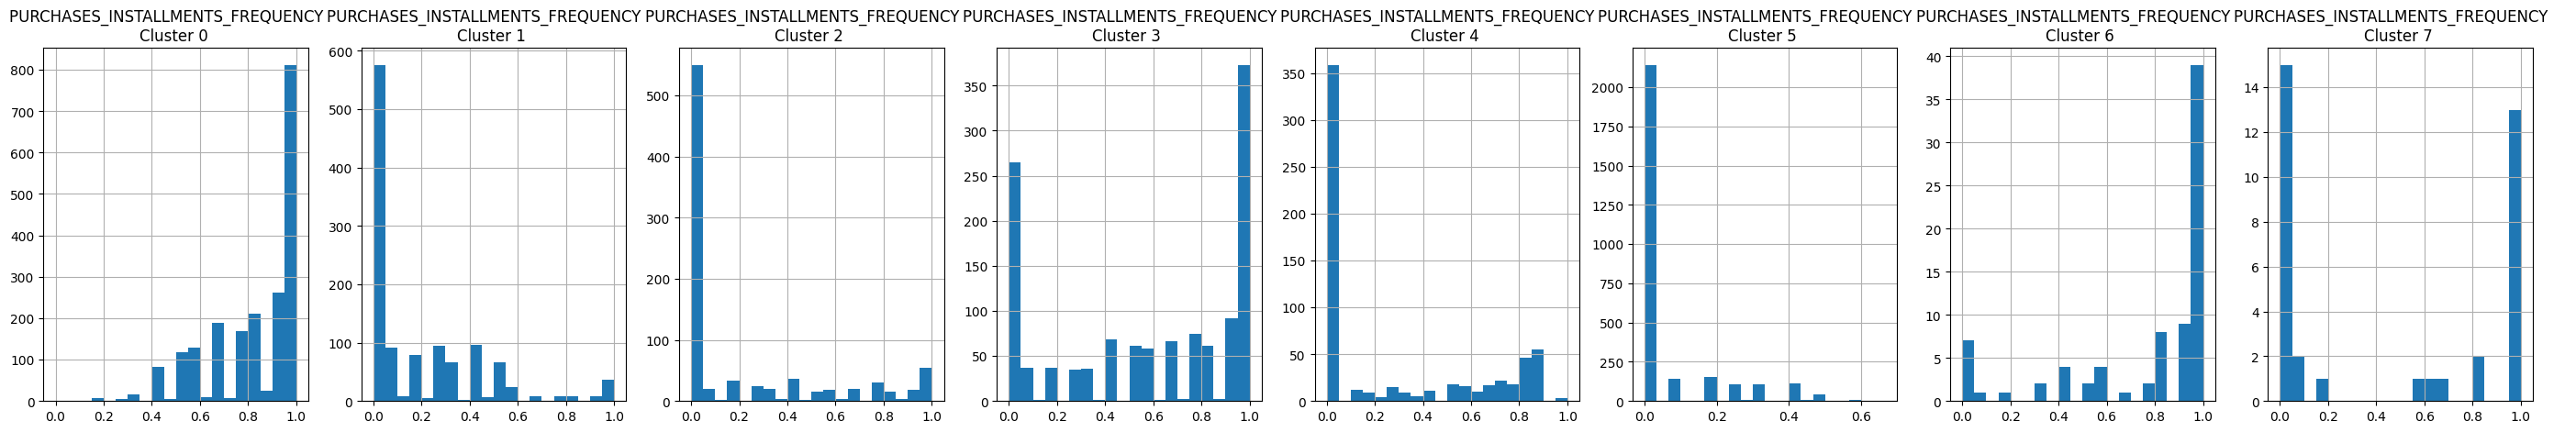

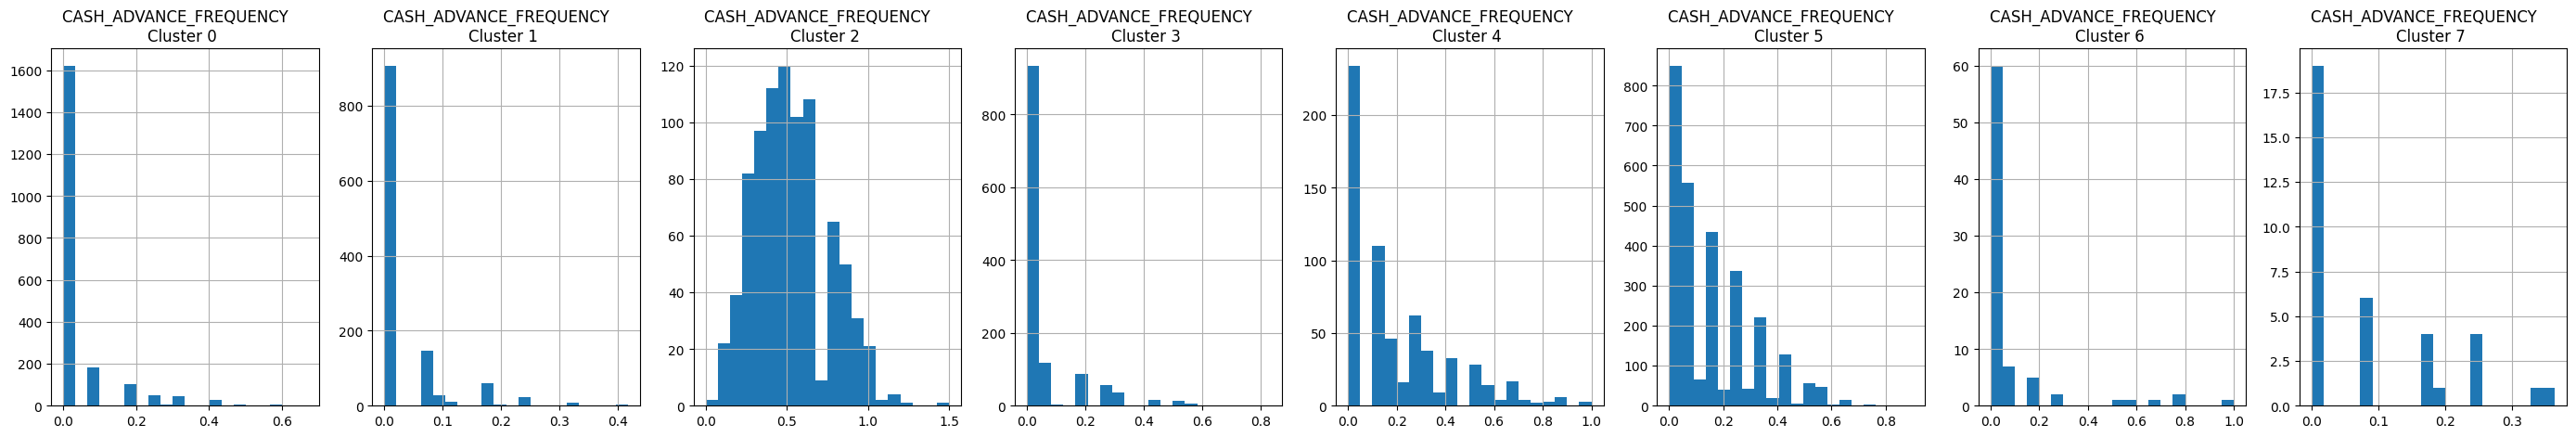

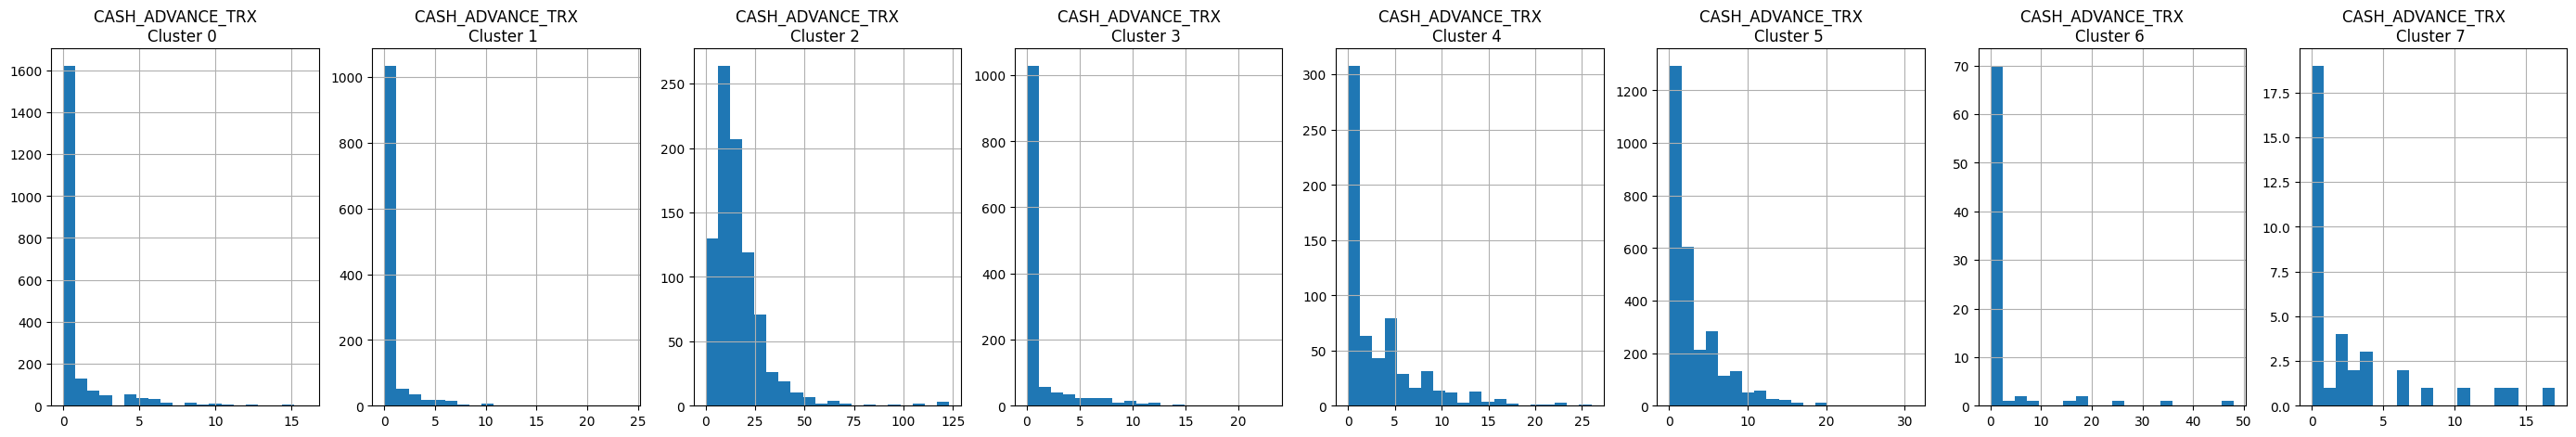

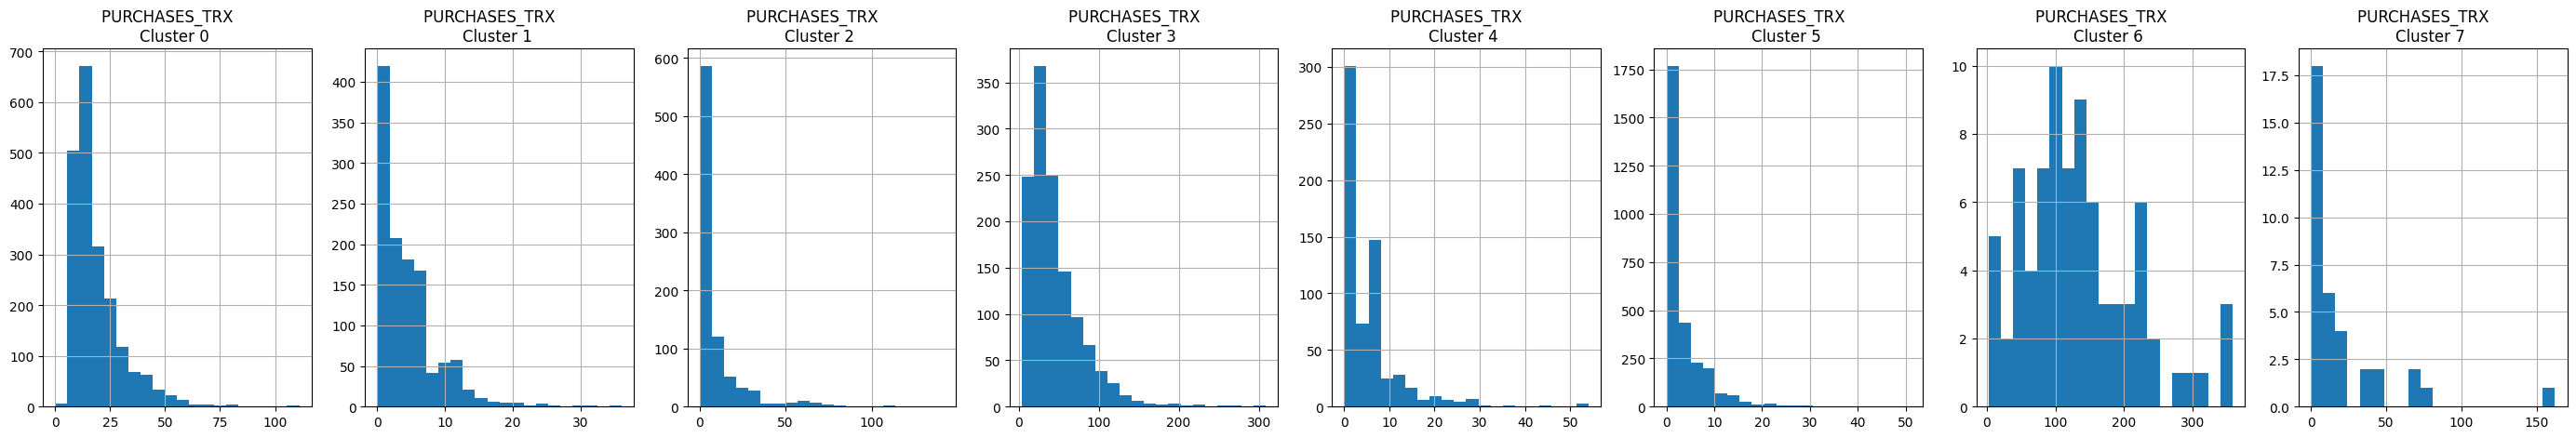

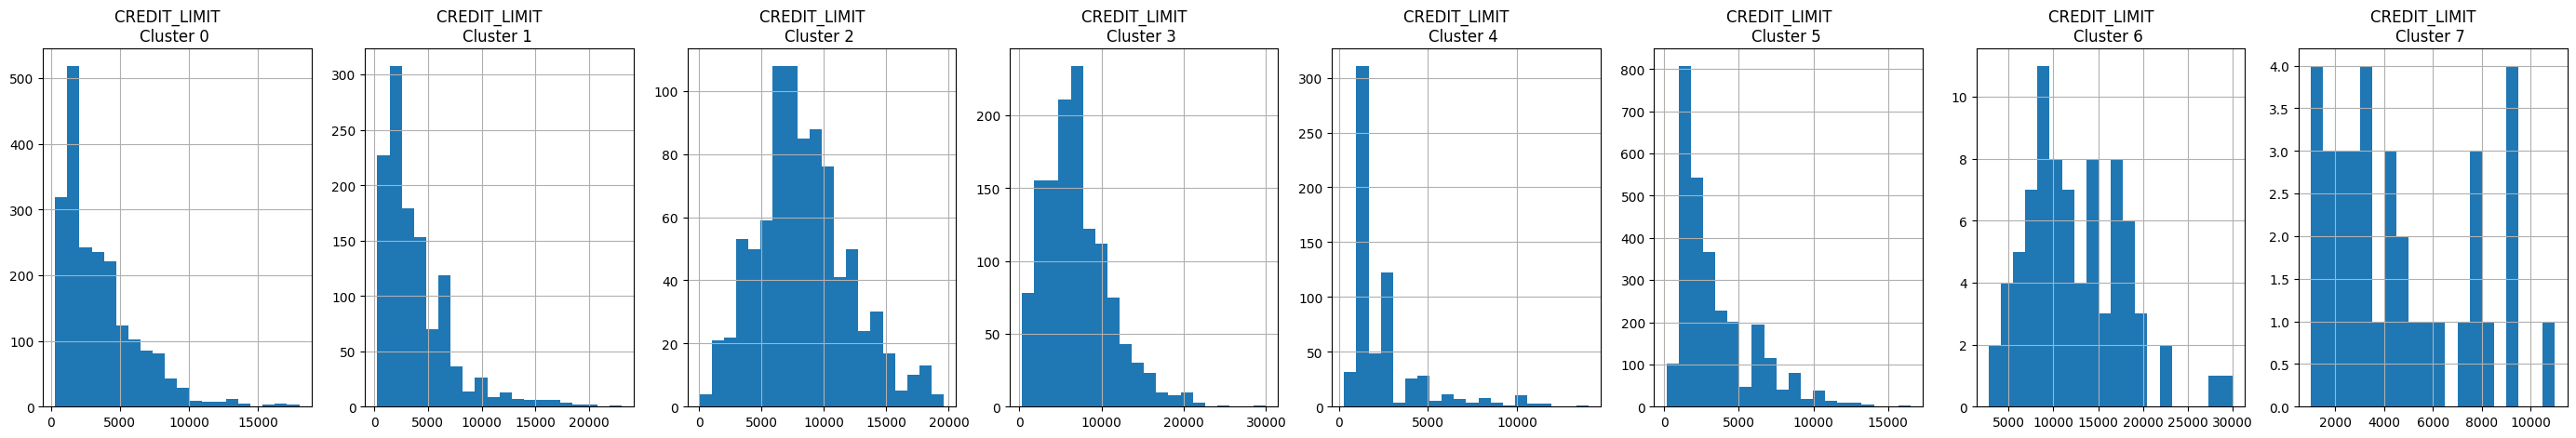

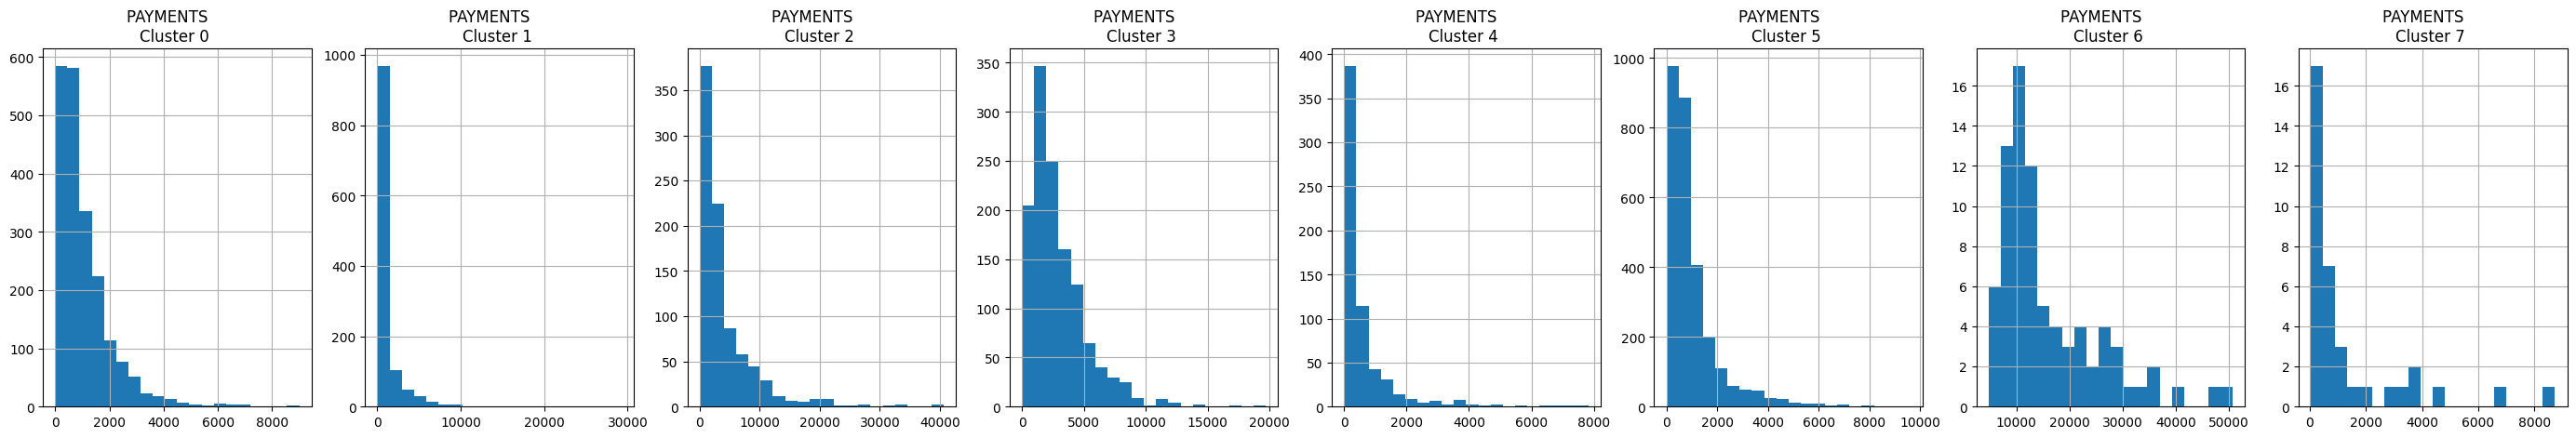

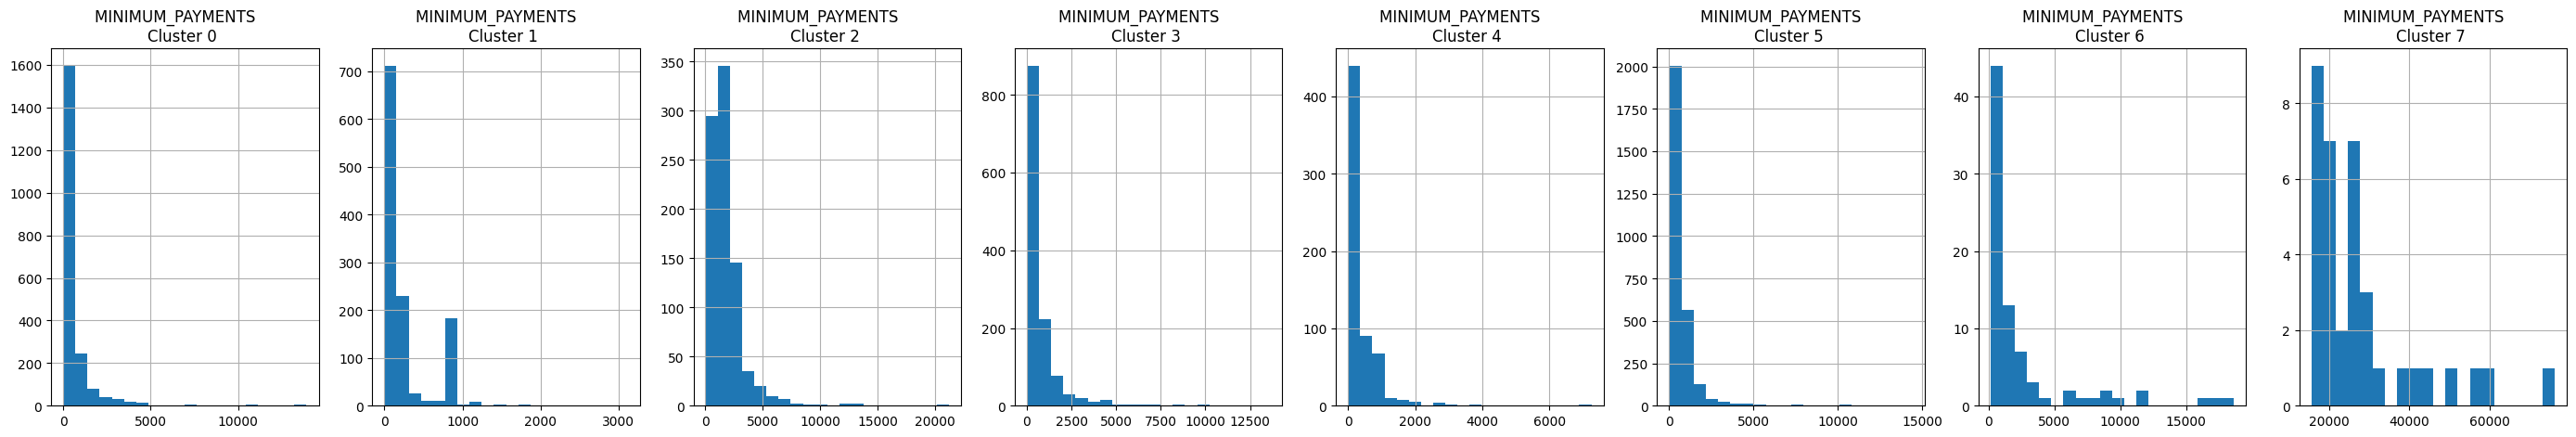

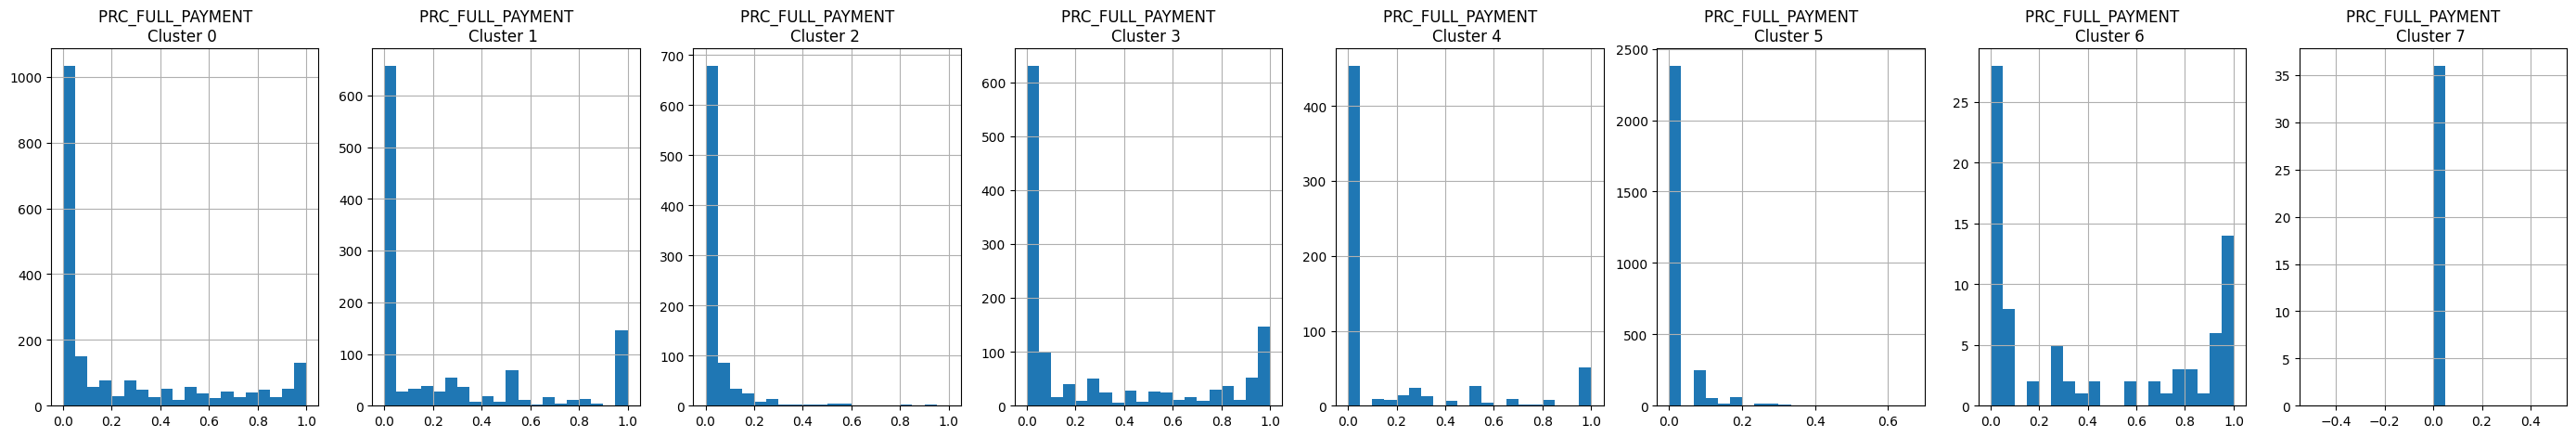

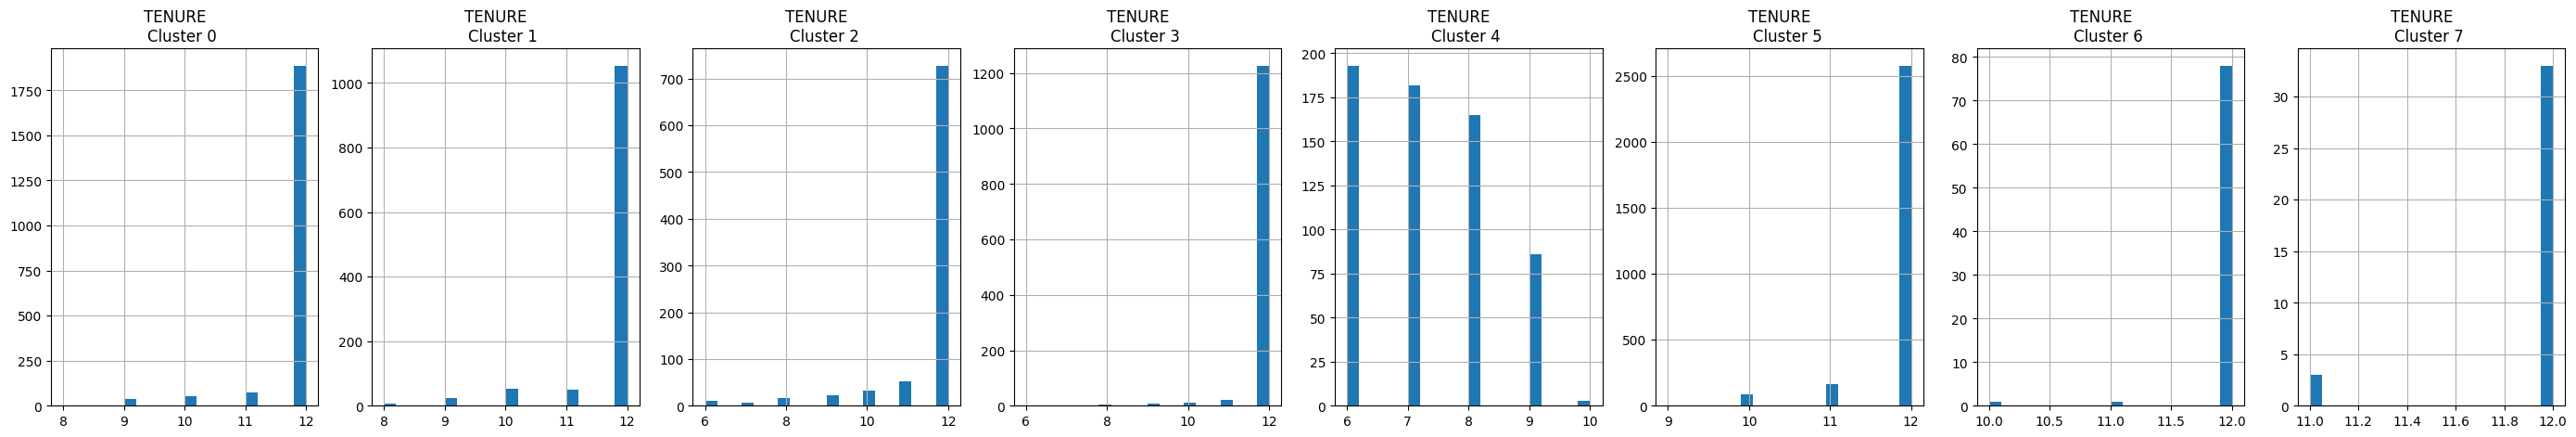

In [37]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [38]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221749, -1.07644828],
       [-1.13829099,  2.50648888],
       [ 0.96967918, -0.38351885],
       ...,
       [-0.92620224, -1.81078955],
       [-2.33654412, -0.6579702 ],
       [-0.55642172, -0.40047032]])

In [39]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682217,-1.076448
1,-1.138291,2.506489
2,0.969679,-0.383519
3,-0.873628,0.043174
4,-1.599431,-0.688582


In [40]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682217,-1.076448,5
1,-1.138291,2.506489,2
2,0.969679,-0.383519,3
3,-0.873628,0.043174,5
4,-1.599431,-0.688582,5


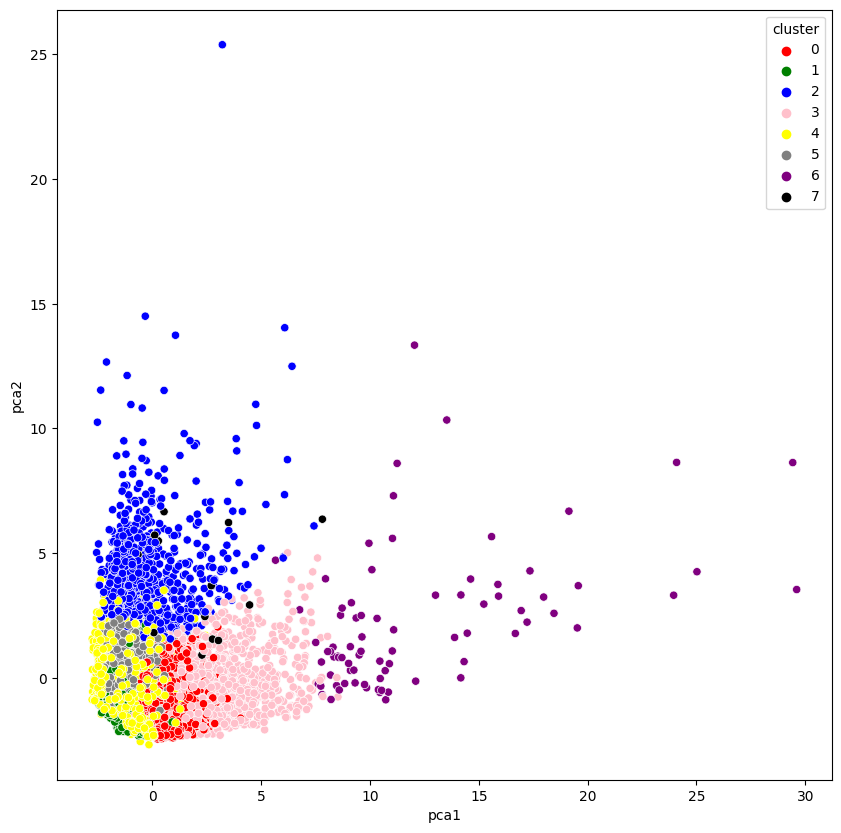

In [41]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", 
                     y="pca2", 
                     hue = "cluster", 
                     data = pca_df, 
                     palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [42]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [43]:
creditcard_df_scaled.shape

(8950, 17)

In [44]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 2s 24ms/step - loss: 0.5183
Epoch 2/25
70/70 [==============================] - 2s 27ms/step - loss: 0.2942
Epoch 3/25
70/70 [==============================] - 2s 26ms/step - loss: 0.2110
Epoch 4/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1753
Epoch 5/25
70/70 [==============================] - 2s 24ms/step - loss: 0.1575
Epoch 6/25
70/70 [==============================] - 2s 26ms/step - loss: 0.1297
Epoch 7/25
70/70 [==============================] - 2s 23ms/step - loss: 0.1155
Epoch 8/25
70/70 [==============================] - 2s 23ms/step - loss: 0.1023
Epoch 9/25
70/70 [==============================] - 2s 24ms/step - loss: 0.0959
Epoch 10/25
70/70 [==============================] - 2s 24ms/step - loss: 0.0857
Epoch 11/25
70/70 [==============================] - 2s 23ms/step - loss: 0.0804
Epoch 12/25
70/70 [==============================] - 2s 23ms/step - loss: 0.0774
Epoch 13/25
70/70 [==================

In [45]:
autoencoder.save_weights('autoencoder.h5')

In [46]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 4ms/step


In [47]:
pred.shape

(8950, 10)

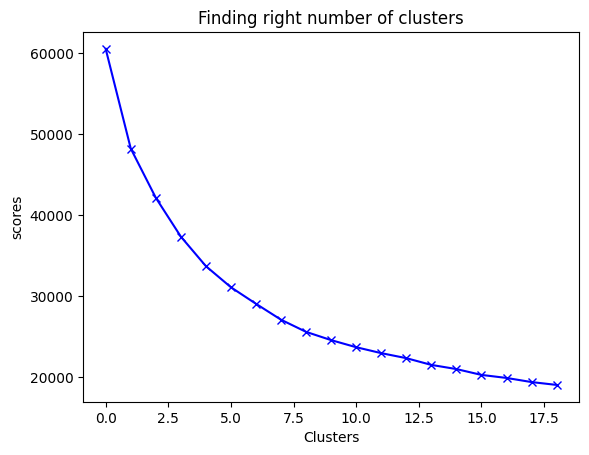

In [48]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

C:\Users\Sebas\AppData\Local\Temp\ipykernel_13860\3412112664.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
C:\Users\Sebas\AppData\Local\Temp\ipykernel_13860\3412112664.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


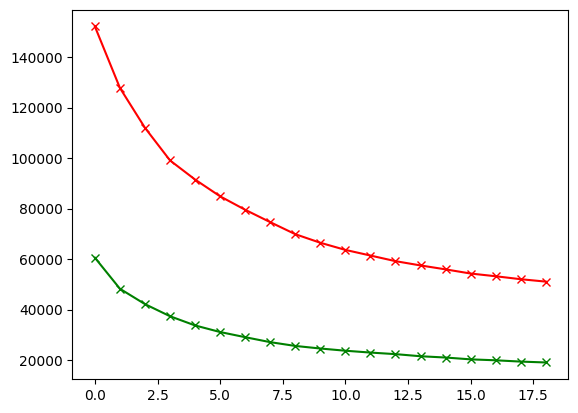

In [49]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')
plt.show()

In [50]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [51]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [52]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.447780,-0.388865
1,-0.210583,1.434421
2,-0.034225,-0.372748
3,-0.002271,0.707299
4,-1.506098,-0.229489


In [53]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.447780,-0.388865,3
1,-0.210583,1.434421,2
2,-0.034225,-0.372748,3
3,-0.002271,0.707299,2
4,-1.506098,-0.229489,3


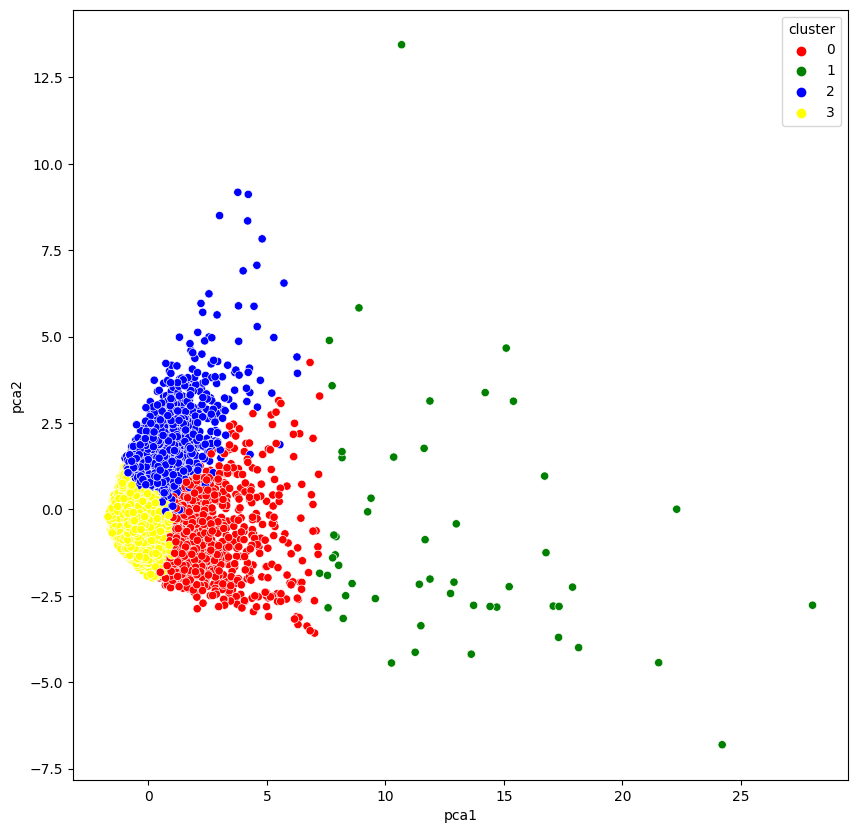

In [54]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()